# Tarea Regresión:

In [1]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
#imports necesarios
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, GammaRegressor, PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Una Variable:

In [3]:
#carga del dataset
df=pd.read_csv("/content/drive/MyDrive/TFM/albretch.csv")

In [4]:
df.rename(columns = {' size':'size'}, inplace = True) #para eliminar el espacio que tiene al principio

In [5]:
df.head() #comprobar el dataset

,effort,size
0,0.5,199
1,2.9,224
2,3.6,500
3,4.1,209
4,4.9,289


In [6]:
#comprobar si hay valores null en el dataset
print(df.isnull().values.any())
print(df['size'].isnull().values.any())
print(df['effort'].isnull().values.any())

False
False
False


In [7]:
print(df.shape)
print(list(df))

(24, 2)
['effort', 'size']


In [8]:
df.info() #informacion de los atributos del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   effort  24 non-null     float64
 1   size    24 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [9]:
df.describe() #descripción de los atributos

,effort,size
count,24.000000,24.000000
mean,21.875000,647.625000
std,28.417895,487.995261
min,0.500000,199.000000
25%,7.150000,287.500000
50%,11.450000,506.000000
75%,19.525000,710.250000
max,105.200000,1902.000000


In [10]:
print(df.corr()) #coeficientes de correlacion

          effort      size
effort  1.000000  0.935014
size    0.935014  1.000000


<Axes: title={'center': 'Size vs Effort'}, xlabel='size', ylabel='effort'>

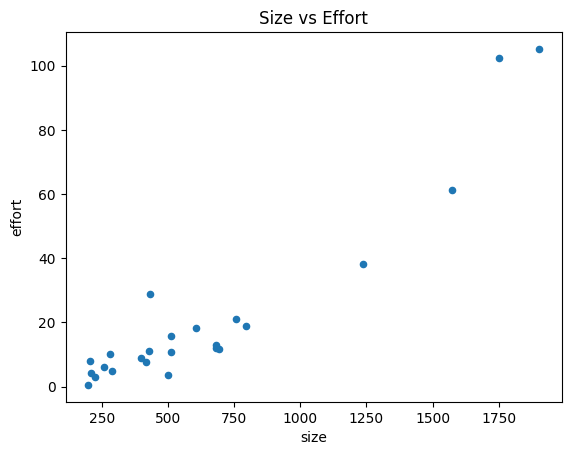

In [11]:
df.plot.scatter(x='size', y='effort', title='Size vs Effort')

In [12]:
#tomar los valores de cada variable
size=df['size'].values
effort=df['effort'].values
size=size.reshape(-1,1)
effort=effort.reshape(-1,1)
print(size)
print(effort)

[[ 199]
 [ 224]
 [ 500]
 [ 209]
 [ 289]
 [ 260]
 [ 417]
 [ 205]
 [ 400]
 [ 283]
 [ 512]
 [ 428]
 [ 694]
 [ 682]
 [ 680]
 [ 512]
 [ 606]
 [ 794]
 [ 759]
 [ 431]
 [1235]
 [1572]
 [1750]
 [1902]]
[[  0.5]
 [  2.9]
 [  3.6]
 [  4.1]
 [  4.9]
 [  6.1]
 [  7.5]
 [  8. ]
 [  8.9]
 [ 10. ]
 [ 10.8]
 [ 11.1]
 [ 11.8]
 [ 12. ]
 [ 12.9]
 [ 15.8]
 [ 18.3]
 [ 19. ]
 [ 21.1]
 [ 28.8]
 [ 38.1]
 [ 61.2]
 [102.4]
 [105.2]]


In [13]:
#escalado de las variables a una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)
size_escalado = alg_escalado.fit_transform(size)
effort_escalado = alg_escalado.fit_transform(effort)
print(size_escalado[0:10])
print(effort_escalado[0:10])

[[-0.93909509]
 [-0.88676324]
 [-0.30901959]
 [-0.91816235]
 [-0.75070042]
 [-0.81140537]
 [-0.48276134]
 [-0.92653544]
 [-0.518347  ]
 [-0.76326007]]
[[-0.76834439]
 [-0.68207414]
 [-0.65691199]
 [-0.63893902]
 [-0.61018227]
 [-0.56704715]
 [-0.51672284]
 [-0.49874987]
 [-0.46639853]
 [-0.426858  ]]


In [14]:
#Separar en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(size, effort, test_size=0.3, random_state=42)

In [15]:
#definir el algoritmo
alg_regresion = LinearRegression()
modelo = alg_regresion.fit(x_train, y_train)
print(modelo)

LinearRegression()


In [16]:
#obtener el coeficiente de la variable independiente y el intercepto
intercepto = modelo.intercept_
print(intercepto)
pendiente = modelo.coef_[0]
print(pendiente)

[-14.34595562]
[0.05598857]


In [17]:
y_pred = modelo.predict(x_test) #predicciones sobre el conjunto de test

In [18]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)

   Actual  Predicted
0     8.9   8.049473
1    18.3  19.583119
2     0.5  -3.204230
3    21.1  28.149370
4    11.1   9.617153
5    10.0   1.498810
6    12.0  23.838250
7     2.9  -1.804516


In [19]:
residuos = y_test - y_pred #calculo de residuos
print(residuos)

[[  0.8505271 ]
 [ -1.28311859]
 [  3.70422993]
 [ -7.04937   ]
 [  1.4828471 ]
 [  8.50118994]
 [-11.83825001]
 [  4.70451565]]


In [20]:
#métricas para evaluar las predicciones
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of determination: {r2:.2f}')

Mean absolute error: 4.93
Mean squared error: 37.82
Root mean squared error: 6.15
Coefficient of determination: 0.10


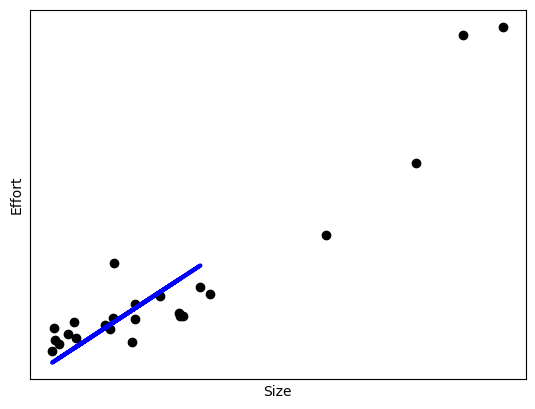

In [21]:
plt.scatter(size, effort, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xlabel('Size')
plt.ylabel('Effort')
plt.xticks(())
plt.yticks(())

plt.show()

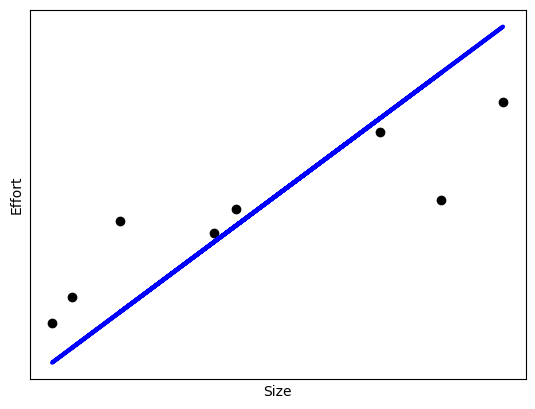

In [22]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xlabel('Size')
plt.ylabel('Effort')
plt.xticks(())
plt.yticks(())

plt.show()

## Dos Variables:

In [23]:
df=pd.read_csv("/content/drive/MyDrive/TFM/Telecom1.csv")

In [24]:
df.head()

,size,effort,EstTotal
0,105,305.22,304
1,237,330.29,274
2,98,333.96,589
3,24,150.40,480
4,197,544.61,648


In [25]:
print(df.isnull().values.any())
print(df['size'].isnull().values.any())
print(df['effort'].isnull().values.any())
print(df['EstTotal'].isnull().values.any())

False
False
False
False


In [26]:
print(df.shape)
print(list(df))

(18, 3)
['size', 'effort', 'EstTotal']


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size      18 non-null     int64  
 1   effort    18 non-null     float64
 2   EstTotal  18 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [28]:
df.describe()

,size,effort,EstTotal
count,18.000000,18.000000,18.000000
mean,100.333333,284.282222,320.333333
std,91.927081,264.740834,240.057346
min,3.000000,23.540000,30.000000
25%,37.250000,119.177500,141.750000
50%,68.500000,222.035000,289.000000
75%,164.000000,352.267500,471.500000
max,284.000000,1115.540000,777.000000


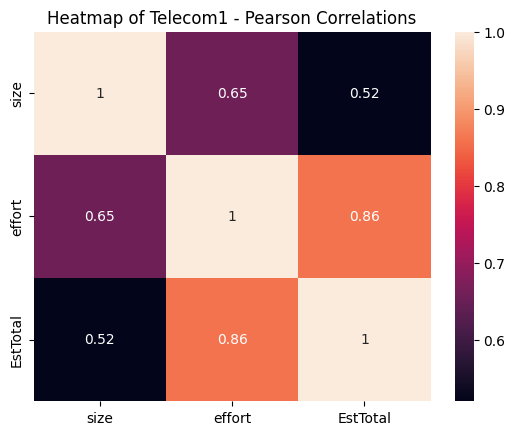

In [29]:
correlations = df.corr()
sns.heatmap(correlations, annot=True).set(title='Heatmap of Telecom1 - Pearson Correlations');

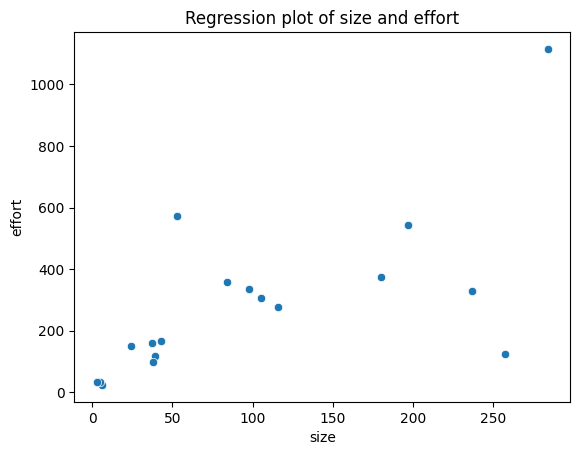

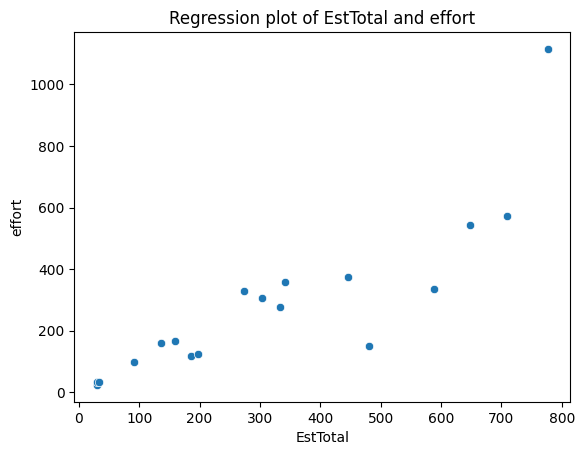

In [30]:
variables = ['size', 'EstTotal']

for var in variables:
    plt.figure() 
    sns.scatterplot(x=var, y='effort', data=df).set(title=f'Regression plot of {var} and effort');

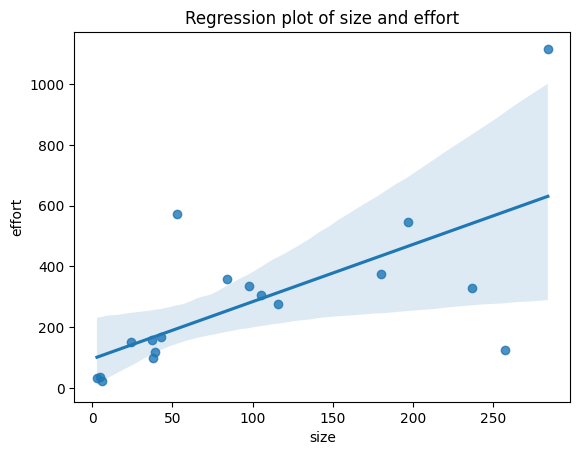

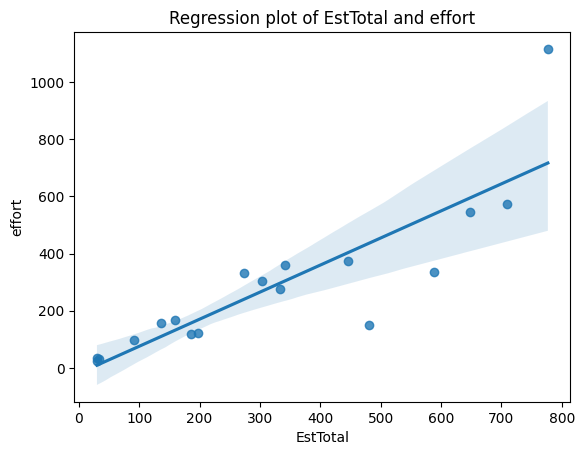

In [31]:
for var in variables:
    plt.figure() 
    sns.regplot(x=var, y='effort', data=df).set(title=f'Regression plot of {var} and effort');

In [32]:
x = df[['size','EstTotal']].values
y = df['effort'].values
algoritmo = LinearRegression()

In [33]:
alg_escalado = StandardScaler(with_mean=True, with_std=True)
x_escalado = alg_escalado.fit_transform(x)
y=y.reshape(-1,1)
y_escalado = alg_escalado.fit_transform(y)
print(x_escalado[0:10])
print(y_escalado[0:10])

[[ 0.05223662 -0.07001186]
 [ 1.52978685 -0.19860507]
 [-0.02611831  1.15162366]
 [-0.85444192  0.68440165]
 [ 1.08204436  1.40452364]
 [-0.68653849 -0.57581183]
 [ 2.05588428  1.95747446]
 [-0.70892561 -0.79013385]
 [-0.52982862  1.66599651]
 [ 0.17536581  0.05429491]]
[[ 0.0813807 ]
 [ 0.17882248]
 [ 0.19308699]
 [-0.52037182]
 [ 1.0118389 ]
 [-0.64680904]
 [ 3.2309228 ]
 [-0.48865563]
 [ 1.12494443]
 [-0.02849879]]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_escalado, y_escalado, test_size=0.3, random_state=42)

In [35]:
modelo_multiple = algoritmo.fit(x_train, y_train)
print(modelo_multiple.coef_)
print(modelo_multiple.intercept_)

[[0.16334888 0.82882202]]
[0.05912651]


In [36]:
y_pred = modelo_multiple.predict(x_test)

In [37]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)

     Actual  Predicted
0  0.081381   0.009632
1  0.178822   0.144407
2  1.124944   1.353394
3 -0.646809  -0.530264
4 -0.520372   0.486802
5  0.287963   0.106237


In [38]:
residuos = y_test - y_pred
print(residuos)

[[ 0.07174877]
 [ 0.03441526]
 [-0.22844975]
 [-0.11654473]
 [-1.00717336]
 [ 0.18172668]]


In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of determination: {r2:.2f}')

Mean absolute error: 0.27
Mean squared error: 0.19
Root mean squared error: 0.43
Coefficient of determination: 0.45


In [40]:
modelo_multiple.score(x_test, y_test)

0.4494610767149595

In [41]:
modelo_multiple.score(x_train, y_train)

0.8198996510214902

### Ridge:

In [42]:
# Ridge
algoritmo = Ridge(alpha=0.5)
modelo_ridge = algoritmo.fit(x_train, y_train)
print(modelo_ridge.coef_)
print(modelo_ridge.intercept_)

[[0.19750637 0.77528446]]
[0.05008161]


In [43]:
y_pred=modelo_ridge.predict(x_test)

In [44]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)

     Actual  Predicted
0  0.081381   0.006120
1  0.178822   0.198249
2  1.124944   1.237058
3 -0.646809  -0.531932
4 -0.520372   0.411930
5  0.287963   0.085975


In [45]:
residuos = y_test - y_pred
print(residuos)

[[ 0.07526113]
 [-0.01942635]
 [-0.11211387]
 [-0.11487696]
 [-0.93230168]
 [ 0.20198871]]


In [46]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of determination: {r2:.2f}')

Mean absolute error: 0.24
Mean squared error: 0.16
Root mean squared error: 0.40
Coefficient of determination: 0.54


In [47]:
modelo_ridge.score(x_test, y_test)

0.5368632520920086

In [48]:
modelo_ridge.score(x_train, y_train)

0.8188067249181018

### Lasso:

In [49]:
# Lasso
algoritmo = Lasso(alpha=0.1)
modelo_lasso = algoritmo.fit(x_train, y_train)
print(modelo_lasso.coef_)
print(modelo_lasso.intercept_)

[0.1149735  0.78111449]
[0.05547757]


In [50]:
y_pred=modelo_lasso.predict(x_test)

In [51]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)

     Actual  Predicted
0  0.081381   0.006796
1  0.178822   0.076229
2  1.124944   1.295895
3 -0.646809  -0.473231
4 -0.520372   0.491835
5  0.287963   0.107002


In [52]:
residuos = y_test - y_pred
print(residuos)

[[ 0.07458459  0.00515149 -1.21451462  0.55461183 -0.41045473 -0.02562082]
 [ 0.17202636  0.10259326 -1.11707284  0.65205361 -0.31301296  0.07182096]
 [ 1.11814831  1.04871521 -0.1709509   1.59817555  0.63310899  1.01794291]
 [-0.65360516 -0.72303826 -1.94270436 -0.17357791 -1.13864447 -0.75381056]
 [-0.52716794 -0.59660104 -1.81626715 -0.0471407  -1.01220726 -0.62737334]
 [ 0.28116737  0.21173427 -1.00793184  0.76119461 -0.20387195  0.18096197]]


In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of determination: {r2:.2f}')

Mean absolute error: 0.29
Mean squared error: 0.19
Root mean squared error: 0.43
Coefficient of determination: 0.44


In [54]:
modelo_lasso.score(x_test, y_test)

0.4429573036612364

In [55]:
modelo_lasso.score(x_train, y_train)

0.8126505501226451